<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/stats306_lab6_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Pivoting for Longer and Wider Tables
## March 8th, 2022

Welcome back!


In [1]:
library(tidyverse)
install.packages("dslabs")
library(dslabs)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1. Preliminaries

In [ ]:
# create a tibble from a dataframe
irisTibble <- as_tibble(iris)

In [ ]:
iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
# initialize tibble from vectors

tib1 <- tibble(
  rank = 1:6,
  names = c("mercury", "venus", "terra", "mars", "jupiter", "saturn"),
  inhabited = c(FALSE, FALSE, TRUE, FALSE, FALSE, FALSE)
)
tib1

rank,names,inhabited
<int>,<chr>,<lgl>
1,mercury,FALSE
2,venus,FALSE
3,terra,TRUE
4,mars,FALSE
5,jupiter,FALSE
6,saturn,FALSE


In [ ]:
# tibble from data entry
tib2 <- tribble(
  ~index, ~language, ~phrase,
  # comment to separate column names from values
  1, "swedish", "hej, världen!",
  2, "czech", "ahoj, světe!",
  3, "irish", "dia duit, domhan!",
  4, "portuguese", "olá, mundo!" 
)
tib2

index,language,phrase
<dbl>,<chr>,<chr>
1,swedish,"hej, världen!"
2,czech,"ahoj, světe!"
3,irish,"dia duit, domhan!"
4,portuguese,"olá, mundo!"


In [ ]:
# non-syntactic names
annoying <- tibble(
  `2019` = 1:10,
  `2020` = `2019` * 2 + rnorm(length(`2019`))
)
annoying

2019,2020
<int>,<dbl>
1,0.3672377
2,3.6141585
3,7.1164816
4,6.2060397
5,12.0916756
6,11.8858673
7,13.4395301
8,14.5807213
9,17.8042871


In [ ]:
annoying[[2]]; annoying %>% select(`2`)

## Tidy Data

"Tidy datasets are all alike, but every messy dataset is messy in its own way." (Hadley Wickham)

Rules of tidy data:

1. Each variable must have its own column
2. Each observation must have its own row
3. Each value must have its own cell

Real world data is usually messy. People who enter/curate data often don't have the data analyst in mind.

Pivoting helps with the following problems:
- One variable spread across multiple columns
- One observation scattered across multiple rows

# 2. Longer Tables

`pivot_longer` takes 4 main arguments:
* `data`: tibble to pivot
* `cols`: columns to lengthen (ignores the others)
* `names_to`: name of the new variable to which old column names (`cols`) get moved
* `values_to`: name of the variable to which pivoted column values get moved

In [ ]:
# example: column names here are really values of a variable, "year"
grades_wide = tribble(
  ~name, ~Sex, ~`2015`, ~`2016`, ~`2017`,
     'Wu',  'M', 83,      89,      93,
  'Alice',  'F', 92,      90,      93,
 'Jordan',   NA, 80,      87,      99,
 'Gilberto','M', 67,      90,      92)
grades_wide

name,Sex,2015,2016,2017
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Wu,M,83,89,93
Alice,F,92,90,93
Jordan,NA,80,87,99
Gilberto,M,67,90,92


In [ ]:
grades_long = grades_wide %>% 
  pivot_longer(
    cols = c(`2015`, `2016`, `2017`),
    names_to = "year",
    values_to = "grades")
grades_long

name,Sex,year,grades
<chr>,<chr>,<chr>,<dbl>
Wu,M,2015,83
Wu,M,2016,89
Wu,M,2017,93
Alice,F,2015,92
Alice,F,2016,90
Alice,F,2017,93
Jordan,NA,2015,80
Jordan,NA,2016,87
Jordan,NA,2017,99


# 3. Wider Tables

`pivot_wider` is the opposite of `pivot_longer` and takes three main parameters:

* `data`: data frame to pivot
* `names_from`: column from which new column names are extracted 
* `values_from`: column from which new values are extracted

In [ ]:
# example: the "type" column contains multiple variable names,
long_countries <- tribble(
  ~country,      ~year, ~type,           ~count,
  #---------------------------------------------
  "Afghanistan",  1999, "cases",            745,
  "Afghanistan",  1999, "population",  19987071,
  "Afghanistan",  2000, "cases",           2666,
  "Afghanistan",  2000, "population",  20595360,
  "Brazil",       1999, "cases",          37737,
  "Brazil",       1999, "population", 172006362
)
long_countries

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362


In [ ]:
wide_countries <- long_countries %>% pivot_wider(
  names_from = type,
  values_from = count)
wide_countries

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362


In [ ]:
# note: pivot longer and pivot wider aren't *exactly* symmetrical

stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks

year,half,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


In [ ]:
stocks %>% 
  pivot_wider(names_from = year, values_from = return) %>% 
  pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")

half,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
1,2016,0.92
2,2015,0.59
2,2016,0.17


# 4. Exercises on MLB dataset

In [2]:
mlb = read_csv('https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab5/mlb.csv')
mlb %>% head

Rows: 1526 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, team, division, BBrate, BB_K
dbl (6): year, PA, HR, AVG, FB, playerid

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,name,team,division,PA,HR,BBrate,BB_K,AVG,FB,playerid
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2016,Abraham Almonte,Indians,Central,194,1,4.1 %,8/42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,10.3 %,20/46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.0 %,0/2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.0 %,0/4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.0 %,0/0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,4.8 %,1/5,0.211,7,9682


#### Exercise 1:
 Calculate the `Home Run to Fly Ball rate (HR/FB)` in total for each team and year. That is $HR\_FB = \frac{\sum HR_i}{\sum FB_i}$. Make sure you have the division at the final dataset. So  you'll have `division`, `team`, `year` and `HR_FB`.

In [3]:
df <- mlb %>% group_by(division, team, year) %>% summarize(HR_FB=sum(HR)/sum(FB))
head(df)

`summarise()` has grouped output by 'division', 'team'. You can override using
the `.groups` argument.


division,team,year,HR_FB
<chr>,<chr>,<dbl>,<dbl>
Central,Indians,2015,0.09964727
Central,Indians,2016,0.11984021
Central,Indians,2017,0.13141026
Central,Indians,2018,0.12936849
Central,Royals,2015,0.08997253
Central,Royals,2016,0.10412148


 #### Exercise 2: 
 Convert this to a wide dataset, so your variables should be `division`, `team`, and `2015-2018`, where values are the `HR/FB` rate. Note that, again, you should ensure that `division` is still in the dataset.

In [4]:
df_wide <- df %>% pivot_wider(names_from = year, values_from = HR_FB)
head(df_wide)

division,team,2015,2016,2017,2018
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264


 #### Exercise 3:
 Create a variable called `increased`, which checks if the `HR/FB` rate was higher in 2018 than it was in 2015 for that team.

In [5]:
df_wide <- df_wide %>% mutate(increased = `2018`>`2015`)
head(df_wide, 15)

division,team,2015,2016,2017,2018,increased
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849,TRUE
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635,TRUE
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314,FALSE
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494,FALSE
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620,TRUE
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264,FALSE
East,Orioles,0.14992722,0.1571610,0.1524138,0.12285714,FALSE
East,Rays,0.11355311,0.1395179,0.1588862,0.10292634,FALSE
East,Red_Sox,0.11068111,0.1353482,0.1067762,0.13297872,TRUE


#### Exercise 4:
Calculate the correlation between each year with the following year. That is $\rho_{2015, 2016}, \rho_{2016, 2017}, \rho_{2017, 2018}$.

(Hint: use the `cor` function along with `summarise`.)

In [6]:
# approach 1
df_wide %>% group_by(.) %>%
  summarise(`2015-2016` = cor(`2015`, `2016`),
          `2016-2017` = cor(`2016`, `2017`),
          `2017-2018` = cor(`2017`, `2018`))

2015-2016,2016-2017,2017-2018
<dbl>,<dbl>,<dbl>
0.6381773,0.2025801,0.3866467


In [7]:
# approach 2
df_wide %>% ungroup %>%
  summarise(`2015-2016` = cor(`2015`, `2016`),
          `2016-2017` = cor(`2016`, `2017`),
          `2017-2018` = cor(`2017`, `2018`))

2015-2016,2016-2017,2017-2018
<dbl>,<dbl>,<dbl>
0.6381773,0.2025801,0.3866467


#### Exercise 5:
Turn `df_wide` back into a "long" dataset called `df_long`.

In [8]:
df_long <- df_wide %>% 
  pivot_longer(`2015`:`2018`, names_to = "year", values_to = "HR_FB")
  head(df_long)

division,team,increased,year,HR_FB
<chr>,<chr>,<lgl>,<chr>,<dbl>
Central,Indians,TRUE,2015,0.09964727
Central,Indians,TRUE,2016,0.11984021
Central,Indians,TRUE,2017,0.13141026
Central,Indians,TRUE,2018,0.12936849
Central,Royals,TRUE,2015,0.08997253
Central,Royals,TRUE,2016,0.10412148


#### Exercise 6:
Using df_long, create a faceted line plot of `HR/FB` rate on `year`. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

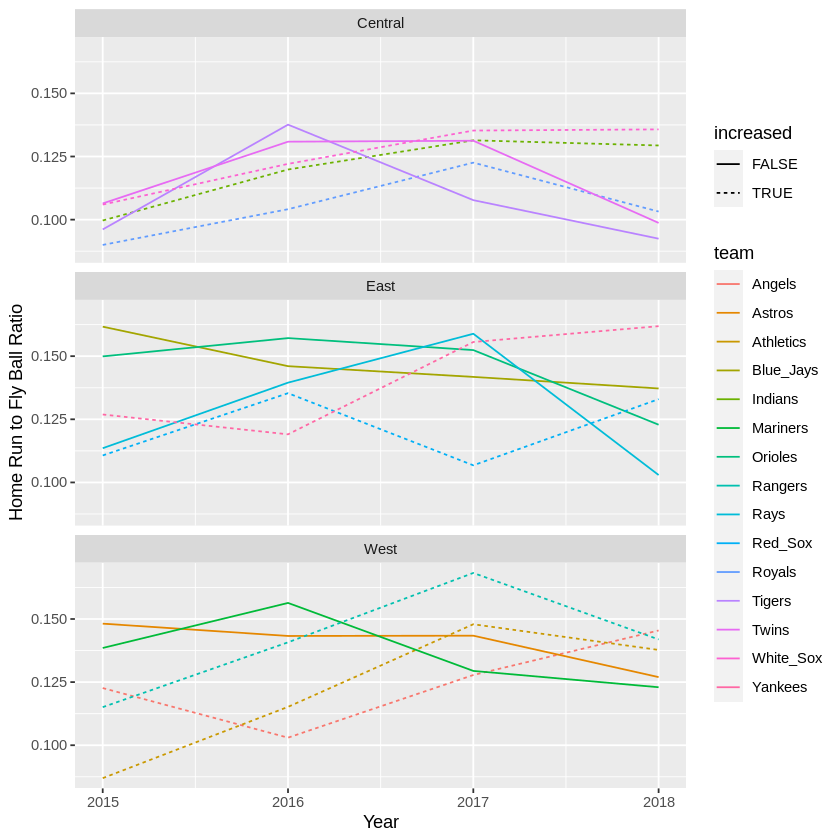

In [9]:
ggplot(df_long, aes(color=team, linetype=increased, x=as.integer(year), y=HR_FB)) + 
    geom_line() + xlab("Year") + ylab("Home Run to Fly Ball Ratio") + 
    facet_wrap(~ division, nrow=3)